# SNPs + vertical transmission: sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib
model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'genetic-variance', 'vertical-trans-variance'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.50]]
}

# EFast

In [4]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans-variance']
    t.to_csv(model_path + "data/param-snp-vt-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-efast.csv")
t.shape

(6000, 3)

In [8]:
t.head()

random-mating  genetic-variance  vertical-trans-variance
0       0.558251          0.279125                 0.279125
1       0.309251          0.278625                 0.263625
2       0.060251          0.278125                 0.248125
3       0.188749          0.277625                 0.232625
4       0.437749          0.277125                 0.217125

In [5]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]


C:\Users\Y75149~1\AppData\Local\Temp/ipykernel_25748/2110209508.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


## Obesity

                               S1        ST   S1_conf   ST_conf
random-mating            0.192484  0.406608  0.003896  0.016968
genetic-variance         0.384405  0.613412  0.003670  0.018772
vertical-trans-variance  0.152249  0.304612  0.004393  0.019319


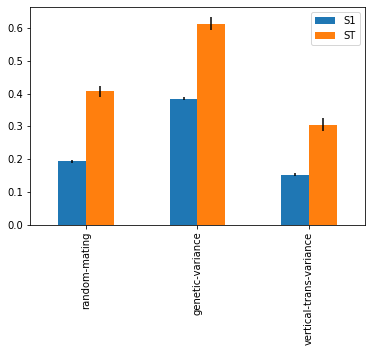

In [6]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav = {
    'ef_obese_s1': ef.tabval('S1'),
    'ef_obese_st': ef.tabval('ST')
}

## BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.098319  0.669410  0.004110  0.017666
genetic-variance         0.200514  0.762468  0.003596  0.018941
vertical-trans-variance  0.065278  0.572506  0.004078  0.018409


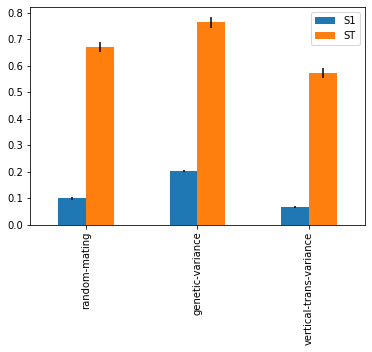

In [7]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['ef_average_s1'] = ef.tabval('S1')
sav['ef_average_st'] = ef.tabval('ST')

## SD BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.247175  0.459991  0.003077  0.018855
genetic-variance         0.357261  0.565991  0.003456  0.018471
vertical-trans-variance  0.139957  0.244216  0.003314  0.017281


['efast-snp-vt.pkl']

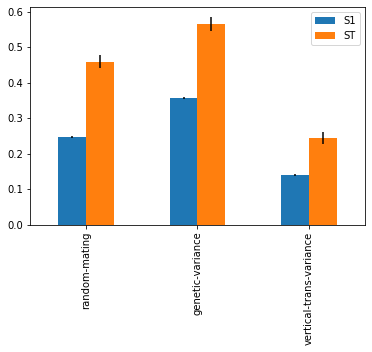

In [24]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['ef_sd_s1'] = ef.tabval('S1')
sav['ef_sd_st'] = ef.tabval('ST')
sav['names'] = ef.Sif['names']

# save output
v = ef.createRows(sav)
joblib.dump(v, 'efast-snp-vt.pkl')



# Sobol

In [25]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans']
    t.to_csv(model_path + "data/param-snp-vt-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-sobol.csv")
len(t)

16384

In [26]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-sobol.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

(16384, 12)


/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_13007/3320049218.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [27]:
params.head()

iteration  replicate  init_pop fertility_type mating_type  \
0          1          1      8000       additive    logistic   
1         10          1      8000       additive    logistic   
2        100          1      8000       additive    logistic   
3       1000          1      8000       additive    logistic   
4      10000          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.156860                   0.367065        0.1         0.000732   
1            0.406860                   0.117065        0.1         0.246826   
2            0.188110                   0.399048        0.1         0.313232   
3            0.210571                   0.332642        0.1         0.864014   
4            0.114136                   0.420776        0.1         0.158447   

   p_fertility_factor  
0                0.25  
1                0.25  
2                0.25  
3                0.25  
4                0.25

## Proportion obese

                               ST   ST_conf
random-mating            0.211875  0.015407
genetic-variance         0.709980  0.038378
vertical-trans-variance  0.146427  0.011415
                               S1   S1_conf
random-mating            0.169671  0.022723
genetic-variance         0.654178  0.043688
vertical-trans-variance  0.114634  0.021871
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.027610  0.035647
(random-mating, vertical-trans-variance)     0.005509  0.035900
(genetic-variance, vertical-trans-variance)  0.020163  0.051805


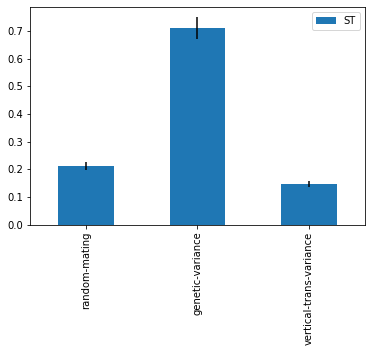

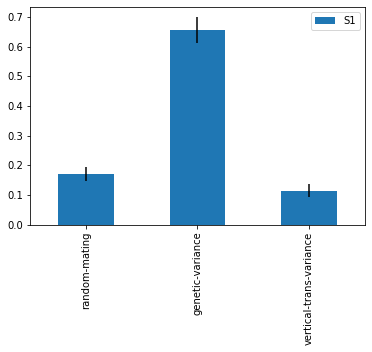

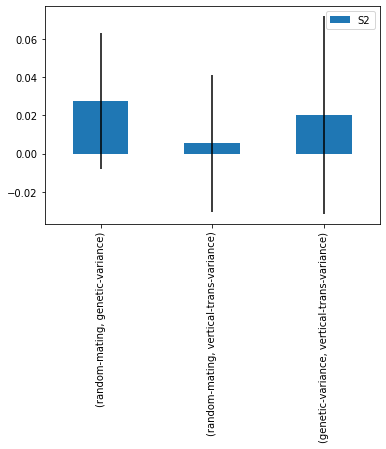

In [28]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}

## Average BMI

                               ST   ST_conf
random-mating            0.212704  0.016392
genetic-variance         0.710257  0.038007
vertical-trans-variance  0.127493  0.010336
                               S1   S1_conf
random-mating            0.178481  0.026869
genetic-variance         0.668101  0.049774
vertical-trans-variance  0.107497  0.020204
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.024957  0.037741
(random-mating, vertical-trans-variance)     0.006131  0.036779
(genetic-variance, vertical-trans-variance)  0.011899  0.058885


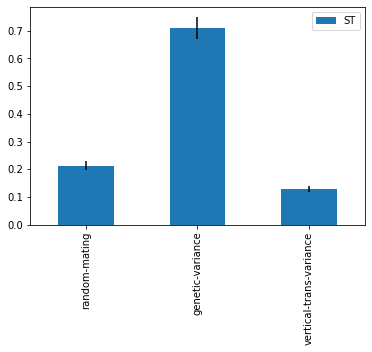

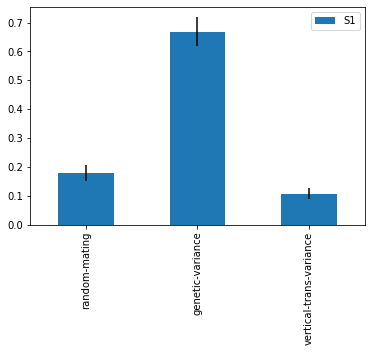

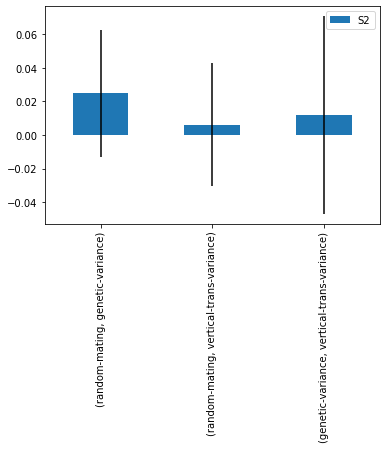

In [29]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## BMI SD

                               ST   ST_conf
random-mating            0.478295  0.045712
genetic-variance         0.500777  0.045035
vertical-trans-variance  0.614239  0.051964
                               S1   S1_conf
random-mating            0.149402  0.040703
genetic-variance         0.112649  0.039509
vertical-trans-variance  0.239524  0.045937
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.087534  0.056602
(random-mating, vertical-trans-variance)     0.107392  0.060967
(genetic-variance, vertical-trans-variance)  0.161767  0.069161


['sobol-snp.pkl']

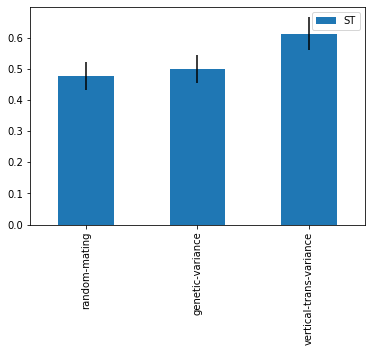

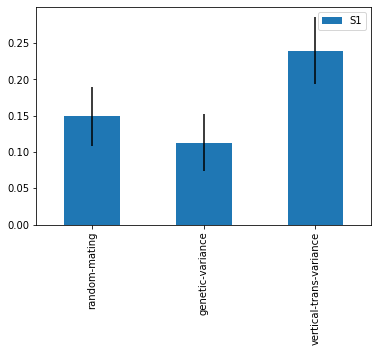

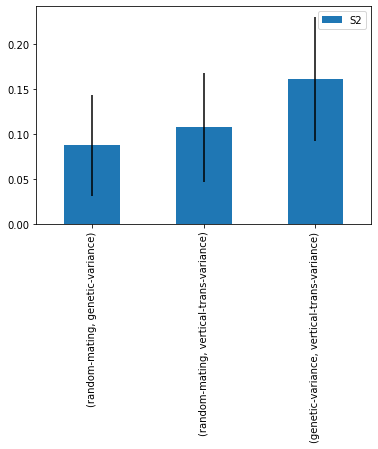

In [30]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')


# save output
v = sb.createRows(sav, g = ['s1', 's2', 'st'])
joblib.dump(v, 'sobol-snp.pkl')
